In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

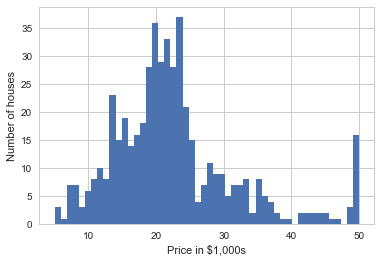

In [6]:

# 価格のヒストグラムです。 (これがモデルを作って、最終的に予測したい値です。）
plt.hist(boston.target,bins=50)

plt.xlabel('Price in $1,000s')
plt.ylabel('Number of houses')

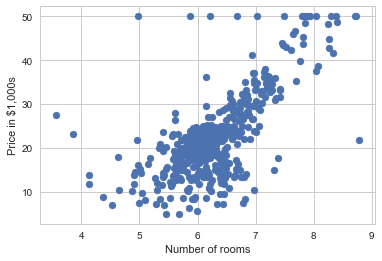

In [7]:
# ラベルがRMになっている5番目の列が、部屋の数です。
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1,000s')
plt.xlabel('Number of rooms')

In [8]:
# DataFrameを作ります。
boston_df = DataFrame(boston.data)

# 列名をつけます。
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


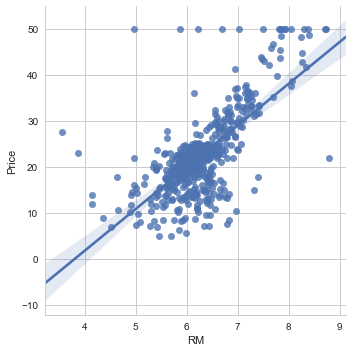

In [11]:
# lmplotを使って、回帰直線を引きます。
sns.lmplot('RM','Price',data = boston_df)

In [12]:
X = boston_df.RM

In [13]:
X = np.vstack(boston_df.RM)

In [14]:
X.shape

(506, 1)

In [15]:

Y = boston_df.Price
print(Y.shape)

(506,)


In [16]:
X = np.array([[value, 1] for value in X])

In [17]:
a,b = np.linalg.lstsq(X,Y)[0]

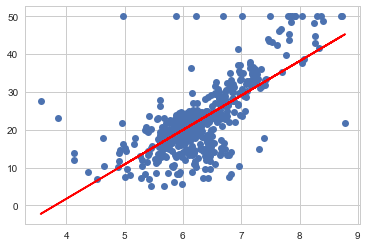

In [18]:
plt.plot(boston_df.RM, boston_df.Price,'o')
x = boston_df.RM
plt.plot(x, a*x + b,'r')

In [19]:
result = np.linalg.lstsq(X,Y)

In [21]:
result

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [22]:
error_total = result[1]
rmse = np.sqrt(error_total/len(X))

In [23]:
error_total

array([ 22061.87919621])

In [24]:
len(X)

506

In [26]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60


In [30]:
import sklearn
from sklearn.linear_model import LinearRegression

In [31]:
lreg = LinearRegression()

In [32]:
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
X_multi = boston_df.drop('Price',1)

In [35]:
X_multi.shape

(506, 13)

In [36]:
Y_target = boston_df.Price

In [37]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
lreg.intercept_

36.491103280363404

In [39]:
lreg.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [40]:
coeff_df = DataFrame(boston_df.columns)

In [41]:
coeff_df

,0
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [42]:
coeff_df.columns=['Features']

In [43]:
coeff_df

,Features
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [44]:
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

In [45]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329
